# Visualization Exercise Sheet

----------------------------------------------------------

In these short questions we will have you work with data from the GALAH spectroscopic survey (https://www.galah-survey.org) of stars in the Milky Way disk, and practice some visualization techniques to help analyze trends in the data.

You will find helpful documentation and examples to help you make the plots at the following graph galleries.
https://python-graph-gallery.com

https://matplotlib.org/stable/plot_types/index.html

**Download the data file 'galahamr.sav' located in the Moodle exercises page, which contains measurements of physical properties of ~7000 nearby stars.**

In [389]:
import numpy as np
from matplotlib import pyplot as plt

In [390]:
#Read in data set
from scipy.io import readsav
filepath = 'galahamr.sav'  #change this to the path on your computer where the file is stored
stars = readsav(filepath)  

In [391]:
#Pull out some attributes of the stars we want to look at and store them in arrays
logg = stars['f']['logg']  #surface gravity   
teff = stars['f']['teff']  #effective temperature
mass = stars['f']['massmean']  #mass
lum = mass**4.  #luminosity for stars 0.43 < Msun < 2
age = stars['f']['agemean'] #age
feh = stars['f']['__fe_h_'] #[Fe/H], a logarithmic Iron abundance
afe = stars['f']['__alpha_fe_']  #[Alpha/Fe], logarithmic relative abundance of alpha elements(O, Si, etc.) relative to Iron

### 1) Consider one version of the Hertzsprung-Russell diagram using effective temperature and surface gravity of the stars ( $T_{eff}$, log(g) ).  Make two types of plots of the stars, with clearly labeled axes and colorbars where suitable: 
* a) a scatter plot with the points colored by age 
* b) a 2D density plot using, e.g. the **kde** package along with the **pcolormesh** routine in matplotlib; or hist2d within matplotlib

### 2) Use a built-in, or hand-written routine to compute the running average of $T_{eff}$ as a function of $log(g)$.  Overplot this average approximation to the distribution of stars.  It should roughly subdivide the sample into cooler and hotter stars at a given value of $log(g)$.

### 3) [OPTIONAL]  Compute the mean and standard deviation ($\sigma$) of the ages of the cool and hot star sub-samples

* What percent of stars have an age that is within $1-\sigma$ of the mean ages of *both* the cool and hot star sub-samples?  e.g., the fraction of stars that have ages within
 
$(mean(age_{hot}) +\sigma(age_{hot}))$ $\leq age \leq$ $(mean(age_{cool}) -\sigma(age_{cool}))$

### 4) Create two versions of a *weighted* 2D density distribution of the sample of stars in the plane of **[Fe/H]** as a function of **age**:
* a) One where the density distribution is weighted by the mass of the stars
* b) One where the density distribution is weighted by the luminosity of the stars

Compute the weighted average metallicity and age for both cases and indicate them on the density distributions.

# Lösungen & Auswertung 



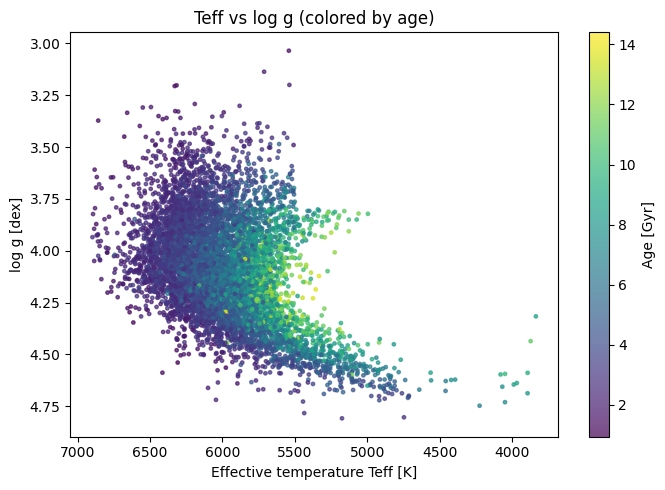

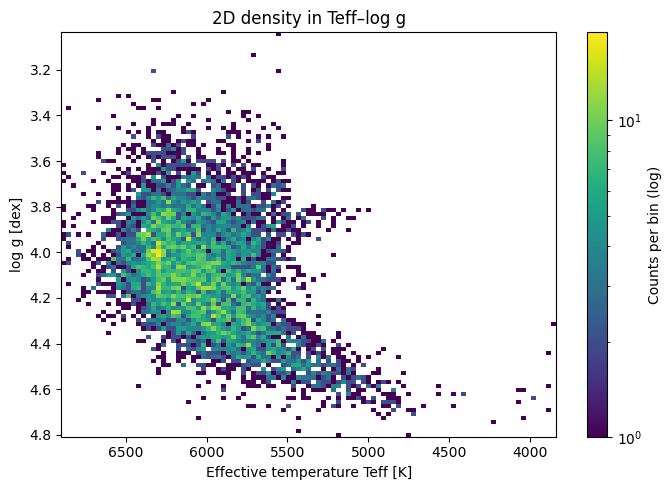

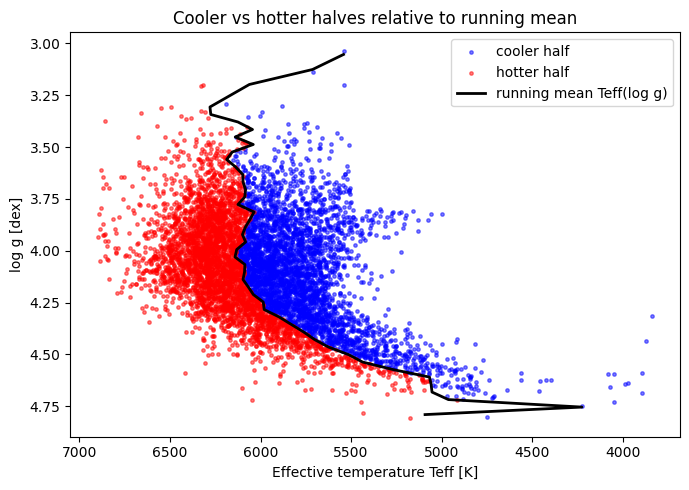

3382 stars in cool half with mean age = 6.79 +/- 2.31 Gyr
3684 stars in hot half with mean age = 3.65 +/- 1.15 Gyr
368 Sterne haben ein Alter zwischen 4.48 und 5
Das sind  5.21 Prozent der Sterne im Datensatz


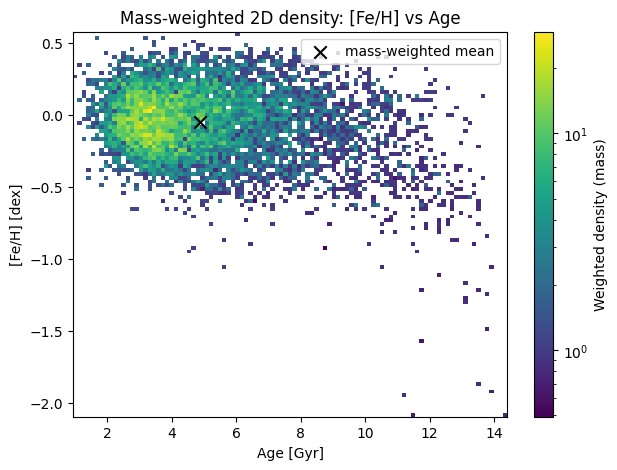

In [ ]:
# Laden der Pakete und der Daten
import numpy as np
import pandas as pd
from scipy.io import readsav
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize

#Pfad zu den Daten und Einlesen
sav_path = "galahamr.sav"
data = readsav(sav_path)
rec = data["f"]

teff = rec["TEFF"].astype(float)
logg = rec["LOGG"].astype(float)
age  = rec["AGEMEAN"].astype(float)
mass = rec["MASSMEAN"].astype(float)
feh  = rec["__FE_H_"].astype(float)


# Beispiel 1a) HR/Kiel-Diagramm: Scatterplot, nach Alter eingefärbt 

plt.figure(figsize=(7,5))
#Scatterplot #Farbe (c) wird durch Alter (age) festgelegt, Punktgröße s und Transparenz alpha
scp1a = plt.scatter(teff, logg, c=age, s=6, alpha=0.7)

#Achsen invertieren, weil im HR/Kiel hohe Temperaturen links, kleine Werte für log g oben
#plt.gca() gibt aktuelle Achse zurück
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#Achsen beschriften
plt.xlabel("Effective temperature Teff [K]")
plt.ylabel("log g [dex]")
#Legende für Farbkodierung und Label dazu
cb = plt.colorbar(scp1a)
cb.set_label("Age [Gyr]")
plt.title("Teff vs log g (colored by age)")
#Alles so anordnen, dass nichts überlappt
plt.tight_layout()
plt.show()

# Beispiel 1b 2D-Dichte Diagramm

plt.figure(figsize=(7,5))

#Daten in Liste einteilen, gleichmäßig in 100 bins zwischen Minimum und Maximum

xbins = np.linspace(teff.min(), teff.max(), 100)
ybins = np.linspace(logg.min(), logg.max(), 100)

#Histogram erstellen mit Funktion plt.hits2d, Normierung der Farbdarstellung logarithmisch, damit die ganzen leeren Bins nicht eingefärbt werden
h = plt.hist2d(teff, logg, bins=[xbins, ybins],norm=LogNorm())

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel("Effective temperature Teff [K]")
plt.ylabel("log g [dex]")

#hist2d liefert 4 Elemente zurück. 
#h[0]: Wie viele Datenpunkte in bin, Histogramm
#h[1]: Grenzen x-bin
#h[2]: Grenzen y-bin
#h[3]: QuadMesh verknüpft 2D-Daten aus h[0] mit Farben
cb = plt.colorbar(h[3])
cb.set_label("Counts per bin (log)")
plt.title("2D density in Teff–log g")
plt.tight_layout()
plt.show()

############################################################
############################################################
# Beispiel 2 Running average von Teff als Funktion von log g

# Teile Bereich zwischen log g max und log g min in 50 bins

bins = np.linspace(logg.min(), logg.max(), 50)

# In welchem Bin liegt die Werte von logg

bin_idf = np.digitize(logg, bins)

#Wert in der Mitte jedes bins berechnen (für running mean)

bin_centers = 0.5*(bins[:-1] + bins[1:])

# (Leeres) Array erstellen mit np.full
# len(bins)-1: Anzahl der Elemente
# np.nan: unbestimmter Anfangswert

mean_teff_bin = np.full(len(bins)-1, np.nan)

#Auswertungsschleife
#Schleife von 1 durch alle Bins (Start bei 1, weil np.digitize() mit 1 anfängt zu nummerieren

for b in range(1, len(bins)):
# Abfrage: Gibt es Sterne in diesem bin (True/False)?    
    m = bin_idf == b
    if np.any(m):
# Wenn Sterne im bin: Mittelwert der Temperaturen der Sterne berechnen, in mean_teff_bin speichern        
        mean_teff_bin[b-1] = teff[m].mean()

#Einteilen der Sterne in heißer/kühler

#check: sind alle Werte endlich?        
allok = np.isfinite(mean_teff_bin)

#Lineare Interpolation mit np.interp()
# logg: für diese Punkte sollen die Daten bestimmt werden
# bin_centers[allok]: Mittelpunkte für Datenpunkte
# mean_teff_bin[allok]: y-Werte für Datenpunkte

teff_mean_at_g = np.interp(logg, bin_centers[allok], mean_teff_bin[allok])

#Vergleich: Ist Stern heißer als Durchschnitt in bin -> hot=True. Ansonsten False
#Umgekehrt für cool

hot = teff > teff_mean_at_g
cool = ~hot

#Plot
plt.figure(figsize=(7,5))

#Auswählen und plotten der Punkte, für die cool=True ist
plt.scatter(teff[cool], logg[cool], s=6, alpha=0.5, color='blue', label="cooler half")
#Auswählen und plotten der Punkte, für die hot=True ist
plt.scatter(teff[hot], logg[hot], s=6, alpha=0.5, color='red', label="hotter half")

#check: sind alle Werte endlich?  
curve = np.isfinite(mean_teff_bin)

#Kurve plotten mit running average (mean_teff_bin) für die jeweiligen bin_centers 
plt.plot(mean_teff_bin[curve], bin_centers[curve], linewidth=2, color='black', label="running mean Teff(log g)")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel("Effective temperature Teff [K]")
plt.ylabel("log g [dex]")
plt.title("Cooler vs hotter halves relative to running mean")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Beispiel 3) (Optional) Altersstatistik 

#Definiere Statistikfunktion
#np.mean: Mittelwert
#np.std: Standardavweichung
#Wenn x 
def stats(x):
    return float(np.mean(x)), float(np.std(x, ddof=1)) 

#Berechnung Mittelwerte
mean_age_cool, std_age_cool = stats(age[cool])
mean_age_hot, std_age_hot = stats(age[hot])

print(np.sum(cool), "stars in cool half with mean age =", round(mean_age_cool,2), "+/-", round(std_age_cool,2), "Gyr")
print(np.sum(hot),  "stars in hot half with mean age =", round(mean_age_hot,2),  "+/-", round(std_age_hot,2),  "Gyr")

upperlim=mean_age_hot+std_age_hot
lowerlim=mean_age_cool-std_age_cool

star_in_bounds=(age >= lowerlim) & (age <= upperlim)
count = np.sum(star_in_bounds)
percent = count/len(age) * 100

print(count, "Sterne haben ein Alter zwischen", round(lowerlim,2), "und", round(upperlim))
print("Das sind ", round(percent,2), "Prozent der Sterne im Datensatz")

# Beispiel 4) Gewichtetete Dichteverteilung von [Fe/H] vs Age 


#Definition Wichtungsfunktion
#x und y Datensatz
#weight: Parameter nach dem gewichtet wird
#Anzahl bins für Histogram
def weighted_hist2d(x, y, weights, bins=100):
#Bin-Grenzen berechnen
    xbins = np.linspace(x.min(), x.max(), bins)
    ybins = np.linspace(y.min(), y.max(), bins)
#Zählen, wie viele Datenpunkt in bin fallen
#Gewichtung nach Parameter weights
#Gibt histogram H zurück und Achsengrenzen xe, ye    
    H, xe, ye = np.histogram2d(x, y, bins=[xbins, ybins], weights=weights)
#Ausgabe von H transponiert
#H gibt Achsen in Reihenfolge [y,x] an, beim plotten brauchen wir aber [x,y]
    return H.T, xe, ye

# 4a) Gewichtetete Dichteverteilung von [Fe/H] vs Age nach Sternmasse
# In welchem Bereich Alter/Metallizität steckt die meiste Sternmasse?
H_mass, xe, ye = weighted_hist2d(age, feh, weights=mass)

#Berechnung mittlteres Alter/Metallizität, gewichtet nach Masse

w_mean_age_mass = float(np.average(age, weights=mass))
w_mean_feh_mass = float(np.average(feh, weights=mass))

#Plot
plt.figure(figsize=(7,5))

#Zeichne Verteilung auf Raster xe/ye von H_mass
#Jedes Bin wird eingefärbt, Farben logarithmisch skaliert
plt.pcolormesh(xe, ye, H_mass, norm=LogNorm())
plt.xlabel("Age [Gyr]")
plt.ylabel("[Fe/H] [dex]")
plt.title("Mass-weighted 2D density: [Fe/H] vs Age")
cb = plt.colorbar()
cb.set_label("Weighted density (mass)")

#Gewichtete Mittelwerte einzeichnen
plt.scatter([w_mean_age_mass], [w_mean_feh_mass], s=80, marker="x", color="black", label="mass-weighted mean")
plt.legend()
plt.tight_layout
plt.show()

# 4b) Gewichtetete Dichteverteilung von [Fe/H] vs Age nach Leuchtkraft
# In welchem Bereich Alter/Metallizität steckt die meiste Leuchtkraft
# Masse als Proxy für Leuchtkraft
lum = mass**4.0

#Analog zu 4a)

H_lum, xe2, ye2 = weighted_hist2d(age, feh, weights=lum)
w_mean_age_lum = float(np.average(age, weights=lum))
w_mean_feh_lum = float(np.average(feh, weights=lum))
plt.figure(figsize=(7,5))
plt.pcolormesh(xe2, ye2, H_lum, norm=LogNorm())
plt.xlabel("Age [Gyr]")
plt.ylabel("[Fe/H] [dex]")
plt.title("Luminosity-weighted 2D density: [Fe/H] vs Age")
cb = plt.colorbar()
cb.set_label("Weighted density (luminosity)")
plt.scatter([w_mean_age_lum], [w_mean_feh_lum], s=80, marker="x", color='black', label="luminosity-weighted mean")
plt.legend()
plt.tight_layout()
plt.show()

